<a href="https://colab.research.google.com/github/sofiatil/NeuralNetworks-Python1/blob/main/ComparingBasicNNArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.regularizers import L2

In [ ]:
# loading the data of MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# image normalization
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
# label encoding to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#DNN with keras
def build_dnn_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

dnn_model = build_dnn_model()
dnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 512)               401920    
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_48 (Dense)            (None, 256)               131328    
                                                                 
 dropout_32 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 5358

In [ ]:
#CNN creation

def build_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

cnn_model = build_cnn_model()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
# importing necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from keras.models import load_model


#define a method for calculating some classification metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

Fold 1/6
Epoch 1/20
782/782 [==============================] - 12s 14ms/step - loss: 0.3742 - accuracy: 0.8846 - val_loss: 0.1443 - val_accuracy: 0.9547
Epoch 2/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1842 - accuracy: 0.9450 - val_loss: 0.1090 - val_accuracy: 0.9653
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 0.1479 - accuracy: 0.9558 - val_loss: 0.0910 - val_accuracy: 0.9723
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1259 - accuracy: 0.9619 - val_loss: 0.0863 - val_accuracy: 0.9741
Epoch 5/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1164 - accuracy: 0.9644 - val_loss: 0.0759 - val_accuracy: 0.9764
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1023 - accuracy: 0.9677 - val_loss: 0.0726 - val_accuracy: 0.9772
Epoch 7/20
782/782 [==============================] - 10s 12ms/step - loss: 0.0931 - accuracy: 0.9715 - val_loss: 0.0709 - val_a

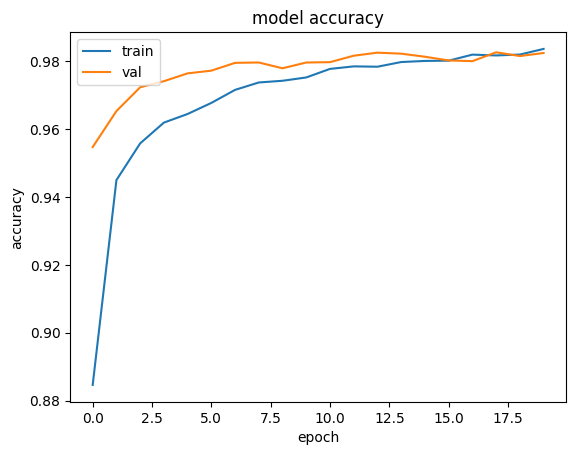

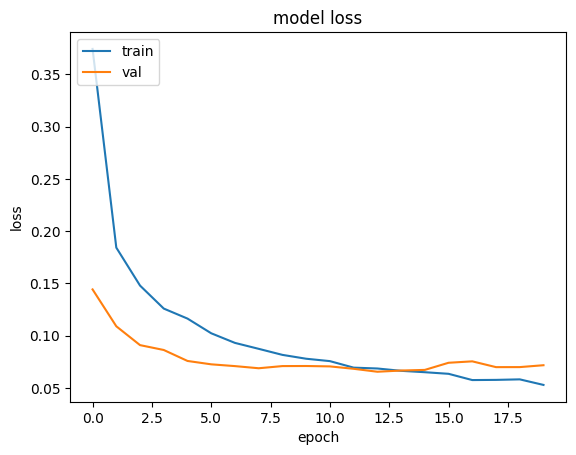

313/313 [==============================] - 1s 3ms/step
Fold 2/6
Epoch 1/20
782/782 [==============================] - 12s 14ms/step - loss: 0.3706 - accuracy: 0.8851 - val_loss: 0.1436 - val_accuracy: 0.9542
Epoch 2/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1831 - accuracy: 0.9454 - val_loss: 0.1051 - val_accuracy: 0.9689
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 0.1451 - accuracy: 0.9560 - val_loss: 0.0939 - val_accuracy: 0.9722
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1241 - accuracy: 0.9622 - val_loss: 0.0914 - val_accuracy: 0.9729
Epoch 5/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1132 - accuracy: 0.9656 - val_loss: 0.0878 - val_accuracy: 0.9748
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1041 - accuracy: 0.9679 - val_loss: 0.0820 - val_accuracy: 0.9772
Epoch 7/20
782/782 [==============================] - 10s 12ms/step - los

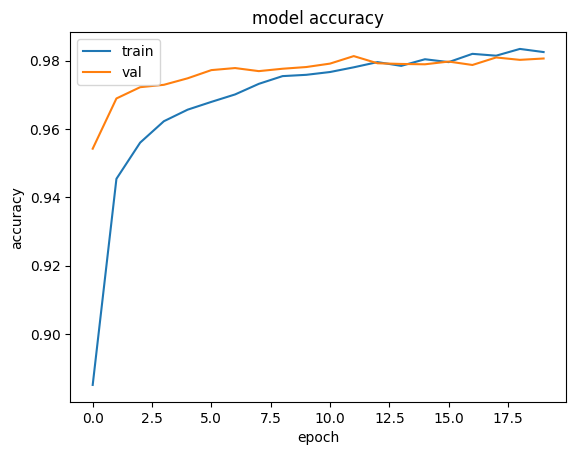

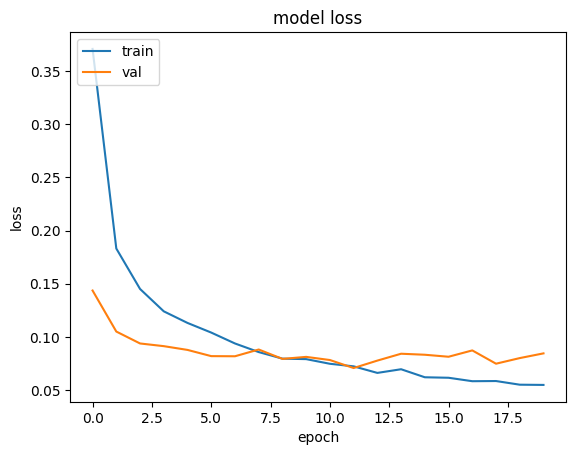

313/313 [==============================] - 2s 5ms/step
Fold 3/6
Epoch 1/20
782/782 [==============================] - 11s 13ms/step - loss: 0.3784 - accuracy: 0.8835 - val_loss: 0.1401 - val_accuracy: 0.9568
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1801 - accuracy: 0.9451 - val_loss: 0.1033 - val_accuracy: 0.9664
Epoch 3/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1416 - accuracy: 0.9583 - val_loss: 0.0884 - val_accuracy: 0.9723
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.0890 - val_accuracy: 0.9730
Epoch 5/20
782/782 [==============================] - 9s 12ms/step - loss: 0.1093 - accuracy: 0.9675 - val_loss: 0.0764 - val_accuracy: 0.9765
Epoch 6/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1032 - accuracy: 0.9684 - val_loss: 0.0793 - val_accuracy: 0.9765
Epoch 7/20
782/782 [==============================] - 11s 14ms/step - los

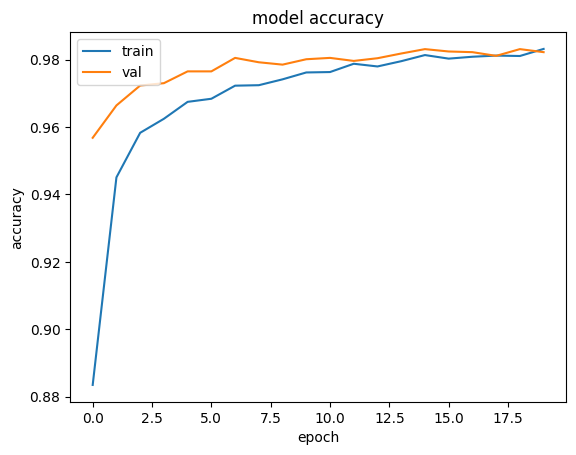

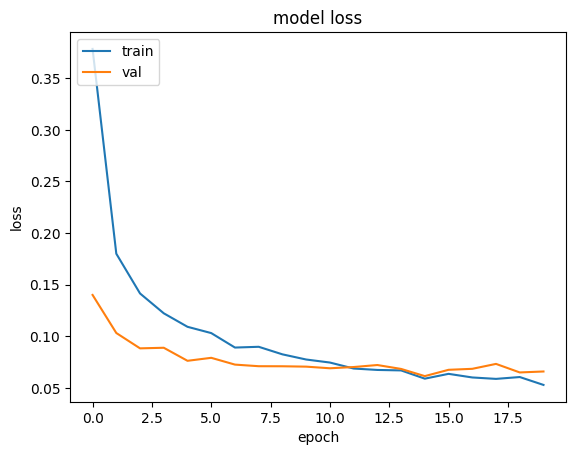

313/313 [==============================] - 1s 3ms/step
Fold 4/6
Epoch 1/20
782/782 [==============================] - 12s 14ms/step - loss: 0.3753 - accuracy: 0.8850 - val_loss: 0.1532 - val_accuracy: 0.9547
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 0.1822 - accuracy: 0.9445 - val_loss: 0.1094 - val_accuracy: 0.9683
Epoch 3/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1455 - accuracy: 0.9564 - val_loss: 0.0944 - val_accuracy: 0.9709
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1236 - accuracy: 0.9623 - val_loss: 0.0979 - val_accuracy: 0.9700
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1098 - accuracy: 0.9668 - val_loss: 0.0922 - val_accuracy: 0.9717
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1001 - accuracy: 0.9688 - val_loss: 0.0869 - val_accuracy: 0.9758
Epoch 7/20
782/782 [==============================] - 11s 14ms/step - los

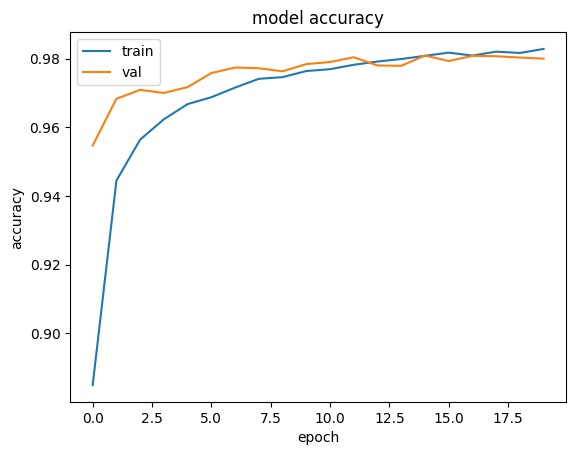

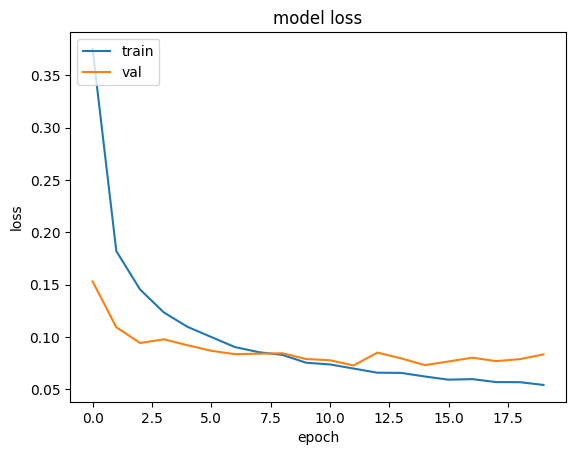

313/313 [==============================] - 1s 3ms/step
Fold 5/6
Epoch 1/20
782/782 [==============================] - 12s 14ms/step - loss: 0.3750 - accuracy: 0.8836 - val_loss: 0.1564 - val_accuracy: 0.9544
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1816 - accuracy: 0.9465 - val_loss: 0.1243 - val_accuracy: 0.9617
Epoch 3/20
782/782 [==============================] - 10s 12ms/step - loss: 0.1463 - accuracy: 0.9562 - val_loss: 0.1039 - val_accuracy: 0.9675
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1272 - accuracy: 0.9614 - val_loss: 0.1093 - val_accuracy: 0.9686
Epoch 5/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1083 - accuracy: 0.9662 - val_loss: 0.0966 - val_accuracy: 0.9725
Epoch 6/20
782/782 [==============================] - 9s 12ms/step - loss: 0.1052 - accuracy: 0.9674 - val_loss: 0.0951 - val_accuracy: 0.9732
Epoch 7/20
782/782 [==============================] - 11s 14ms/step - los

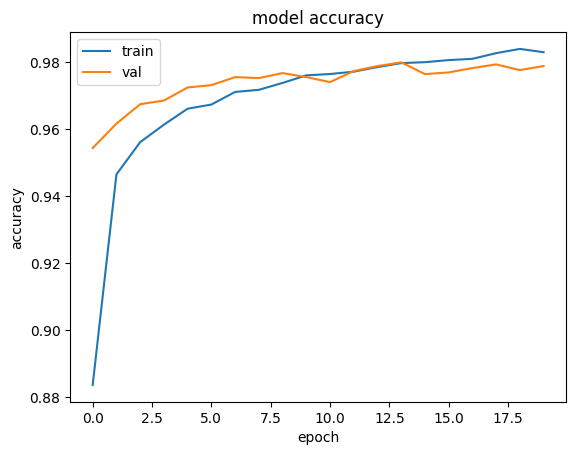

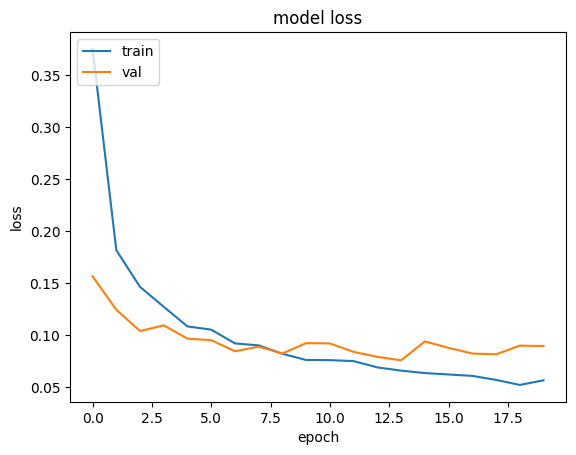

313/313 [==============================] - 1s 3ms/step
Fold 6/6
Epoch 1/20
782/782 [==============================] - 12s 14ms/step - loss: 0.3753 - accuracy: 0.8849 - val_loss: 0.1424 - val_accuracy: 0.9580
Epoch 2/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1815 - accuracy: 0.9466 - val_loss: 0.1103 - val_accuracy: 0.9685
Epoch 3/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1433 - accuracy: 0.9565 - val_loss: 0.0957 - val_accuracy: 0.9719
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1231 - accuracy: 0.9628 - val_loss: 0.1020 - val_accuracy: 0.9721
Epoch 5/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.0770 - val_accuracy: 0.9767
Epoch 6/20
782/782 [==============================] - 12s 15ms/step - loss: 0.1033 - accuracy: 0.9685 - val_loss: 0.0731 - val_accuracy: 0.9797
Epoch 7/20
782/782 [==============================] - 10s 12ms/step - lo

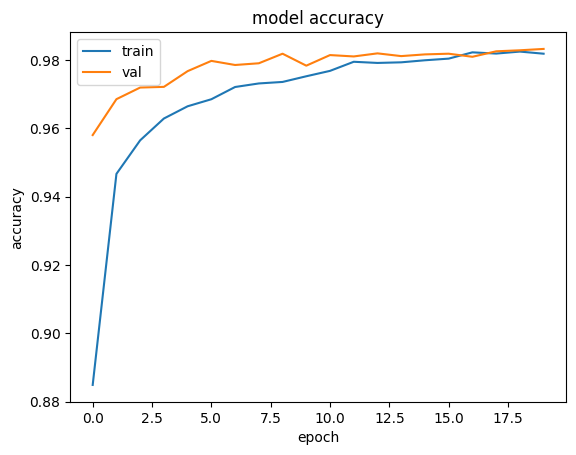

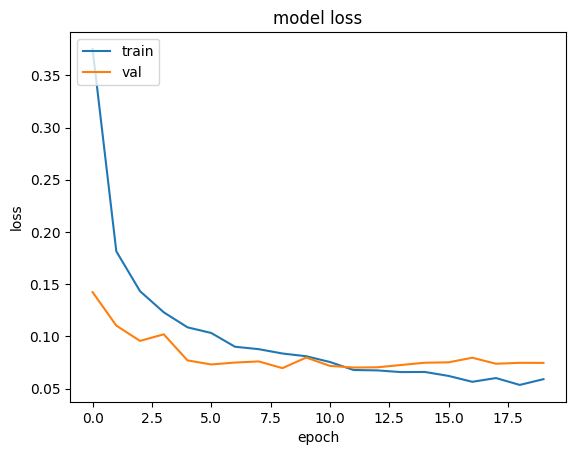

313/313 [==============================] - 1s 3ms/step


"plt.plot(dnn_history.history['accuracy'])\nplt.plot(dnn_history.history['val_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'val'], loc='upper left')\nplt.show()\n\n\nplt.plot(dnn_history.history['loss'])\nplt.plot(dnn_history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'val'], loc='upper left')\nplt.show()"

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt

num_folds = 6
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# define lists to hold the results
results = []

#save each of the 6 models in a list to determine the best one after their evaluating them
dnn_models=[]

# training the DNN model using stratified k fold validation
for fold_idx, (train_index, val_index) in enumerate(skf.split(train_images, np.argmax(train_labels, axis=1))):
    print(f"Fold {fold_idx+1}/{num_folds}")

    # separate the train and validation sets
    x_train, x_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # build DNN model
    dnn_model = build_dnn_model()
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # train the DNN model with train set and evaluate on validation set
    dnn_history = dnn_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), verbose=1)

    # plot accuracy and loss for train and validation sets
    plt.plot(dnn_history.history['accuracy'])
    plt.plot(dnn_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


    plt.plot(dnn_history.history['loss'])
    plt.plot(dnn_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


    #after trainign predict the val labels
    y_train_pred = dnn_model.predict(x_train)
    y_test_pred = dnn_model.predict(test_images)

    # evaluate the models on train and test sets
    dnn_train_acc, dnn_train_precision, dnn_train_recall, dnn_train_f1 = calculate_metrics(np.argmax(y_train, axis=1), np.argmax(y_train_pred, axis=1))
    dnn_test_acc, dnn_test_precision, dnn_test_recall, dnn_test_f1 = calculate_metrics(np.argmax(test_labels, axis=1), np.argmax(y_test_pred, axis=1))

    #add model to the list
    dnn_models.append(['DNN-'+str(fold_idx+1), dnn_model, dnn_test_f1])


    # append the results
    results.append(['DNN', 'Train', fold_idx+1, dnn_train_acc, dnn_train_precision, dnn_train_recall, dnn_train_f1])
    results.append(['DNN', 'Test', fold_idx+1, dnn_test_acc, dnn_test_precision, dnn_test_recall, dnn_test_f1])






In [ ]:
# create a dataframe containing the DNN models with F1-scores in the test set
dnn_f1_df = pd.DataFrame(dnn_models, columns = ['Model Name', 'Model Object', 'F1-Score'])


In [ ]:

cnn_models=[]

# training the CNN model and evaluating
for fold_idx, (train_index, val_index) in enumerate(skf.split(train_images, np.argmax(train_labels, axis=1))):
    print(f"Fold {fold_idx+1}/{num_folds}")

    # separate the train and validation sets
    x_train, x_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]


    # build CNN model
    cnn_model = build_cnn_model()
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # train the CNN model with validation set
    cnn_history = cnn_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), verbose=1)

    #plot accuracy and loss for train-validation set
    plt.plot(dnn_history.history['accuracy'])
    plt.plot(dnn_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


    plt.plot(dnn_history.history['loss'])
    plt.plot(dnn_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()



    y_train_pred = cnn_model.predict(x_train)
    y_test_pred = cnn_model.predict(test_images)


    # evaluate the CNN model on train and test sets
    cnn_train_acc, cnn_train_precision, cnn_train_recall, cnn_train_f1 = calculate_metrics(np.argmax(y_train, axis=1), np.argmax(y_train_pred, axis=1))
    cnn_test_acc, cnn_test_precision, cnn_test_recall, cnn_test_f1 = calculate_metrics(np.argmax(test_labels, axis=1), np.argmax(y_test_pred, axis=1))

    # append the current cnn model and its f1 score to the list
    cnn_models.append(['CNN-'+str(fold_idx+1), cnn_model, cnn_test_f1])


    # append the results
    results.append(['CNN', 'Train', fold_idx+1, cnn_train_acc, cnn_train_precision, cnn_train_recall, cnn_train_f1])
    results.append(['CNN', 'Test', fold_idx+1, cnn_test_acc, cnn_test_precision, cnn_test_recall, cnn_test_f1])



# create a DataFrame to store the results for DNN and CNN
columns = ['Technique', 'Set', 'Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results, columns=columns)

# save DataFrame as CSV
results_df.to_csv('erotima1.csv', index=False)


In [ ]:
#create a dataframe for CNN models and their F1-Scores
cnn_f1_df = pd.DataFrame(cnn_models, columns=['Model Name', 'Model Object', 'F1-Score'])

In [ ]:
# find the best CNN, DNN models according to their f1-score in test set

best_ind = dnn_f1_df['F1-Score'].idxmax()
best_dnn = dnn_f1_df.loc[best_ind, 'Model Object']

best_ind = cnn_f1_df['F1-Score'].idxmax()
best_cnn = cnn_f1_df.loc[best_ind, 'Model Object']

# save the best models in .h5 files
best_dnn.save('/content/drive/MyDrive/Neural Networks - assignment 1/bestDNN.h5')
best_cnn.save('/content/drive/MyDrive/Neural Networks - assignment 1/bestCNN.h5')


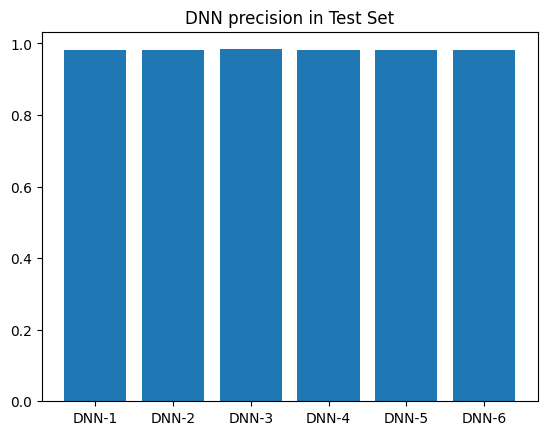

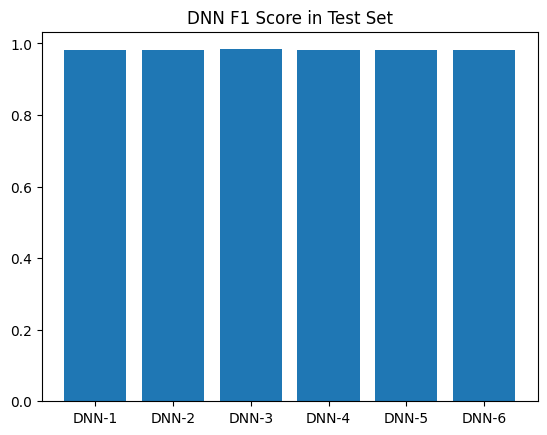

In [ ]:
#plot f1 and precision scores on test set for each of the 6 models

import matplotlib.pyplot as plt


# plot for the DNN models
DNN_x_axis = ['DNN-1', 'DNN-2', 'DNN-3', 'DNN-4', 'DNN-5', 'DNN-6']
DNN_prec_values = []
DNN_f1_values=[]

for ind in results_df.index:
  if results_df['Technique'][ind]=='DNN' and results_df['Set'][ind]=='Test':
      DNN_prec_values.append(results_df['Precision'][ind])
      DNN_f1_values.append(results_df['F1 Score'][ind])

plt.title("DNN precision in Test Set")
plt.bar(DNN_x_axis, DNN_prec_values)
plt.show()

plt.title("DNN F1 Score in Test Set")
plt.bar(DNN_x_axis, DNN_f1_values)
plt.show()


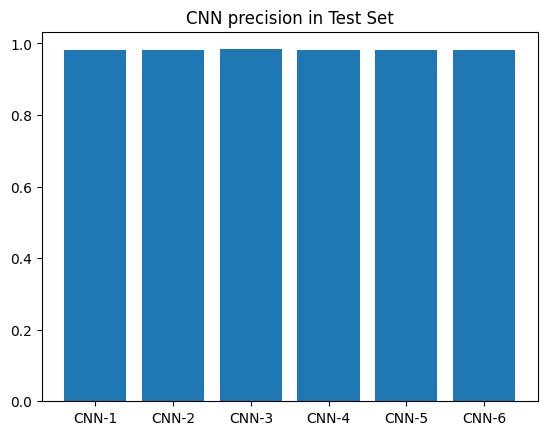

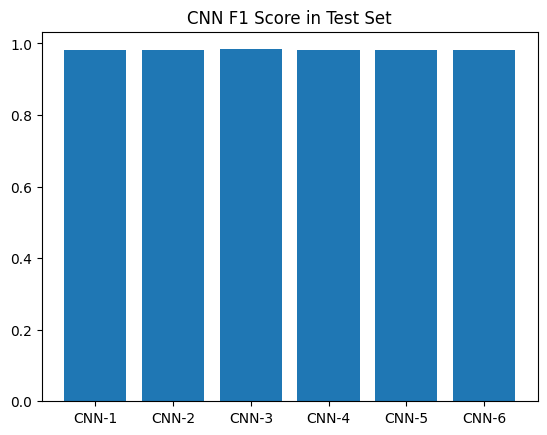

In [ ]:
# plot for the CNN models
CNN_x_axis = ['CNN-1', 'CNN-2', 'CNN-3', 'CNN-4', 'CNN-5', 'CNN-6']
CNN_prec_values = []
CNN_f1_values=[]

for ind in results_df.index:
  if results_df['Technique'][ind]=='CNN' and results_df['Set'][ind]=='Test':
      # print(results_df['F1 Score'][ind])
      CNN_prec_values.append(results_df['Precision'][ind])
      CNN_f1_values.append(results_df['F1 Score'][ind])


plt.title("CNN precision in Test Set")
plt.bar(CNN_x_axis, DNN_prec_values)
plt.show()

plt.title("CNN F1 Score in Test Set")
plt.bar(CNN_x_axis, DNN_f1_values)
plt.show()
